In [1]:
#install dependencies
#----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("tab10", 10)

from itertools import chain

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data to pandas. Include names of column headers as list, establish na_values
#----------------------------------------------
df = pd.read_table("../data_from_source/breast-cancer-wisconsin.data", sep=",", header=None, 
                 names=["sample_code_num", "clump_thickness","uniformity_cell_size", "uniformity_cell_shape", \
                    "marginal_adhesion", 'single_epithelial_cell_size', "bare_nuclei", "bland_chromatin", \
                        "normal_nucleoli", "mitoses", 'class'])
df.head()

,sample_code_num,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#check shape of dataframe
#----------------------------------------------
df.shape

(699, 11)

In [4]:
#check dataframe info
#----------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sample_code_num              699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_cell_size         699 non-null    int64 
 3   uniformity_cell_shape        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
#find non-numeric values
#----------------------------------------------
df[~df.bare_nuclei.str.isnumeric()]

,sample_code_num,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [6]:
#re-import data establishing ? as null; drop column for sample_code_num
#----------------------------------------------
df = pd.read_table("../data_from_source/breast-cancer-wisconsin.data",  na_values='?', sep=",", header=None, 
                 names=["sample_code_num", "clump_thickness","uniformity_cell_size", "uniformity_cell_shape", \
                    "marginal_adhesion", 'single_epithelial_cell_size', "bare_nuclei", "bland_chromatin", \
                        "normal_nucleoli", "mitoses", 'class'])
df_dropped = df.drop(columns=["sample_code_num"])
df_dropped.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [7]:
#check dataframe info
#----------------------------------------------
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              699 non-null    int64  
 1   uniformity_cell_size         699 non-null    int64  
 2   uniformity_cell_shape        699 non-null    int64  
 3   marginal_adhesion            699 non-null    int64  
 4   single_epithelial_cell_size  699 non-null    int64  
 5   bare_nuclei                  683 non-null    float64
 6   bland_chromatin              699 non-null    int64  
 7   normal_nucleoli              699 non-null    int64  
 8   mitoses                      699 non-null    int64  
 9   class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
#find number of null values
#----------------------------------------------
df_dropped.isnull().sum()

clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [9]:
#drop null values
#----------------------------------------------
df_dropped = df_dropped.dropna()
df_dropped.shape

(683, 10)

In [10]:
#change type of column with NaNs to the same dtype
#----------------------------------------------
df_dropped["bare_nuclei"] = df_dropped["bare_nuclei"].astype(int)

In [11]:
#check the dtype change was correctly changed
#----------------------------------------------
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              683 non-null    int64
 1   uniformity_cell_size         683 non-null    int64
 2   uniformity_cell_shape        683 non-null    int64
 3   marginal_adhesion            683 non-null    int64
 4   single_epithelial_cell_size  683 non-null    int64
 5   bare_nuclei                  683 non-null    int64
 6   bland_chromatin              683 non-null    int64
 7   normal_nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


# Exploratory Analysis

In [12]:
#descriptive stats from data
#----------------------------------------------
df_dropped.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Statistics for column named 'class' do not provide a lot of information this way as they only contain two values with '2' representing a benign finding while '4' represents a malignant finding.

In [13]:
df_dropped.shape

(683, 10)

In [14]:
# check for column names and put them in a list for use in iteration for plots
#----------------------------------------------
for column in df_dropped:
    print(column)
names = df_dropped.columns
names = names.format()
print(type(names))

clump_thickness
uniformity_cell_size
uniformity_cell_shape
marginal_adhesion
single_epithelial_cell_size
bare_nuclei
bland_chromatin
normal_nucleoli
mitoses
class
<class 'list'>


In [15]:
#create function for seaborn histplot
#----------------------------------------------
def sns_displot(x,ax,**plt_kwargs):
    sns.distplot(x, ax=ax,**plt_kwargs)

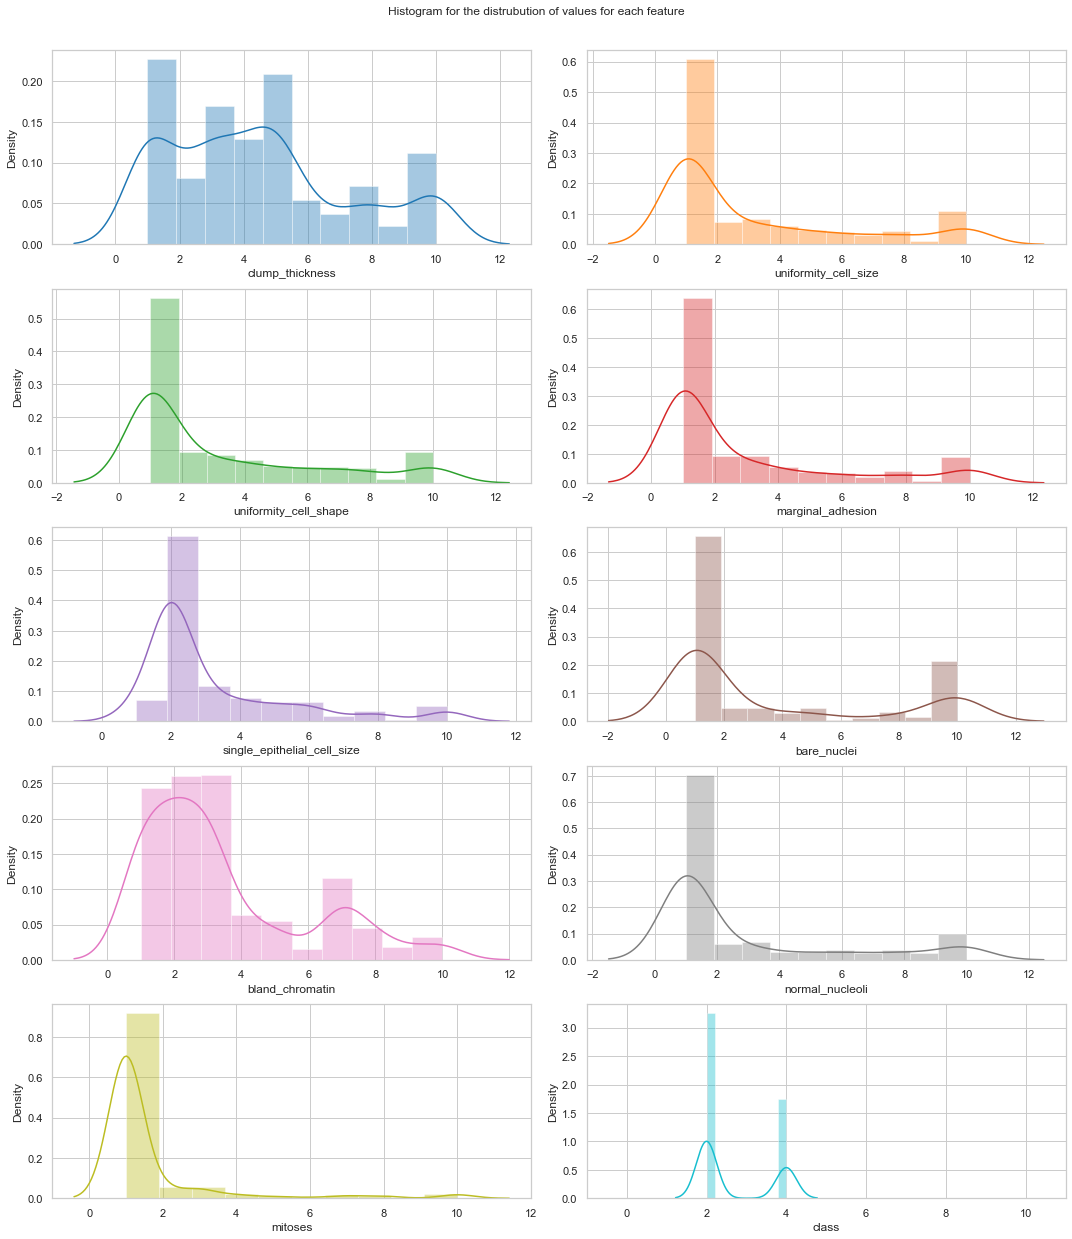

In [16]:
#create multiple subplots to see the distribution of values for each feature
#----------------------------------------------
fig, axs = plt.subplots(5,2,\
    figsize=(15,17),sharey=False)
plt.suptitle('Histogram for the distrubution of values for each feature', y=1.01)
plt.xlim((-1,11))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))=axs

ax_lst = list(tuple(chain.from_iterable(axs)))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',\
    'tab:pink','tab:gray','tab:olive','tab:cyan']

for i in range(len(names)):
    sns_displot([df_dropped[str(names[i])]], ax=ax_lst[i], bins=10, color=colors[i], axlabel=names[i])

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/histograms.png', bbox_inches='tight',dpi=600)
plt.show()

In [17]:
#define probability mass function
#----------------------------------------------
def PMF(data,x):
    prob = data[x].value_counts(normalize=True, sort=True)
    # prob = prob.to_numpy()
    return prob

In [18]:
#check function with one feature
#----------------------------------------------
print(PMF(df_dropped,'class'))

2    0.650073
4    0.349927
Name: class, dtype: float64


In [19]:
#define function for cumuluative distribution plots
#----------------------------------------------
def PMF_cdistplot(x, data,ax,color,**plt_kwargs):
    sns.histplot(
    data=data, x=x, ax=ax, color=color, element="step",
    cumulative=True, stat="density", alpha=0.5, common_norm=False,
)

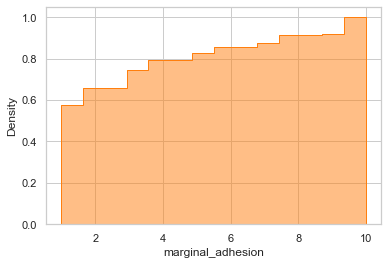

In [20]:
#test function for cumulative distribution plots
#----------------------------------------------
_ = PMF_cdistplot(df_dropped['marginal_adhesion'], df_dropped, color='tab:orange', ax=plt.gca())
_

In [21]:
#define function for PMF plots
#----------------------------------------------
def PMF_plot(x, y,ax,**plt_kwargs):
    sns.barplot(x=x, y=y, ax=ax, ci=None, **plt_kwargs
)

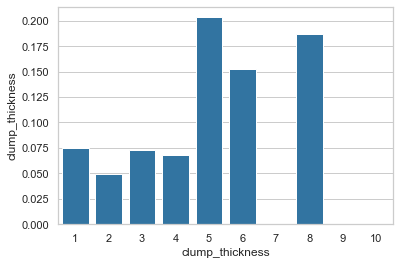

In [22]:
#test function for cumulative distribution plots
#----------------------------------------------
_ = PMF_plot(df_dropped['clump_thickness'],PMF(df_dropped,'clump_thickness'), ax=plt.gca(), color='tab:blue')
_

In [23]:
#create new dataframe for pmf calculated with PMF function
#----------------------------------------------
pmf_list = [] # intitiate empty list
for i in range(len(names)): #create loop that iterates through list with column names
    pmf = PMF(df_dropped,names[i])
    pmf_list.append(pmf)

pmf_df = pd.DataFrame(pmf_list) # create dataframe
pmf_df = pd.pivot_table(pmf_df,columns=pmf_df.index, fill_value=0)
pmf_df = pmf_df.reset_index()
pmf_df = pmf_df.rename(columns={'index':'score'})
pmf_df

,score,bare_nuclei,bland_chromatin,class,clump_thickness,marginal_adhesion,mitoses,normal_nucleoli,single_epithelial_cell_size,uniformity_cell_shape,uniformity_cell_size
0,1,0.588580,0.219619,0.000000,0.203514,0.575403,0.824305,0.632504,0.064422,0.506589,0.546120
1,2,0.043924,0.234261,0.650073,0.073206,0.084919,0.051245,0.052709,0.550512,0.084919,0.065886
2,3,0.040996,0.235725,0.000000,0.152269,0.084919,0.048316,0.061493,0.103953,0.077599,0.076135
3,4,0.027818,0.057101,0.349927,0.115666,0.048316,0.017570,0.026354,0.070278,0.062958,0.055637
4,5,0.043924,0.049780,0.000000,0.187408,0.033675,0.008785,0.027818,0.057101,0.046852,0.043924
5,6,0.005857,0.013177,0.000000,0.048316,0.030747,0.004392,0.032211,0.058565,0.042460,0.036603
6,7,0.011713,0.103953,0.000000,0.033675,0.019034,0.013177,0.023426,0.016105,0.043924,0.027818
7,8,0.030747,0.040996,0.000000,0.064422,0.036603,0.011713,0.033675,0.030747,0.039531,0.040996
8,9,0.013177,0.016105,0.000000,0.020498,0.005857,0.000000,0.021962,0.002928,0.010249,0.008785
9,10,0.193265,0.029283,0.000000,0.101025,0.080527,0.020498,0.087848,0.045388,0.084919,0.098097


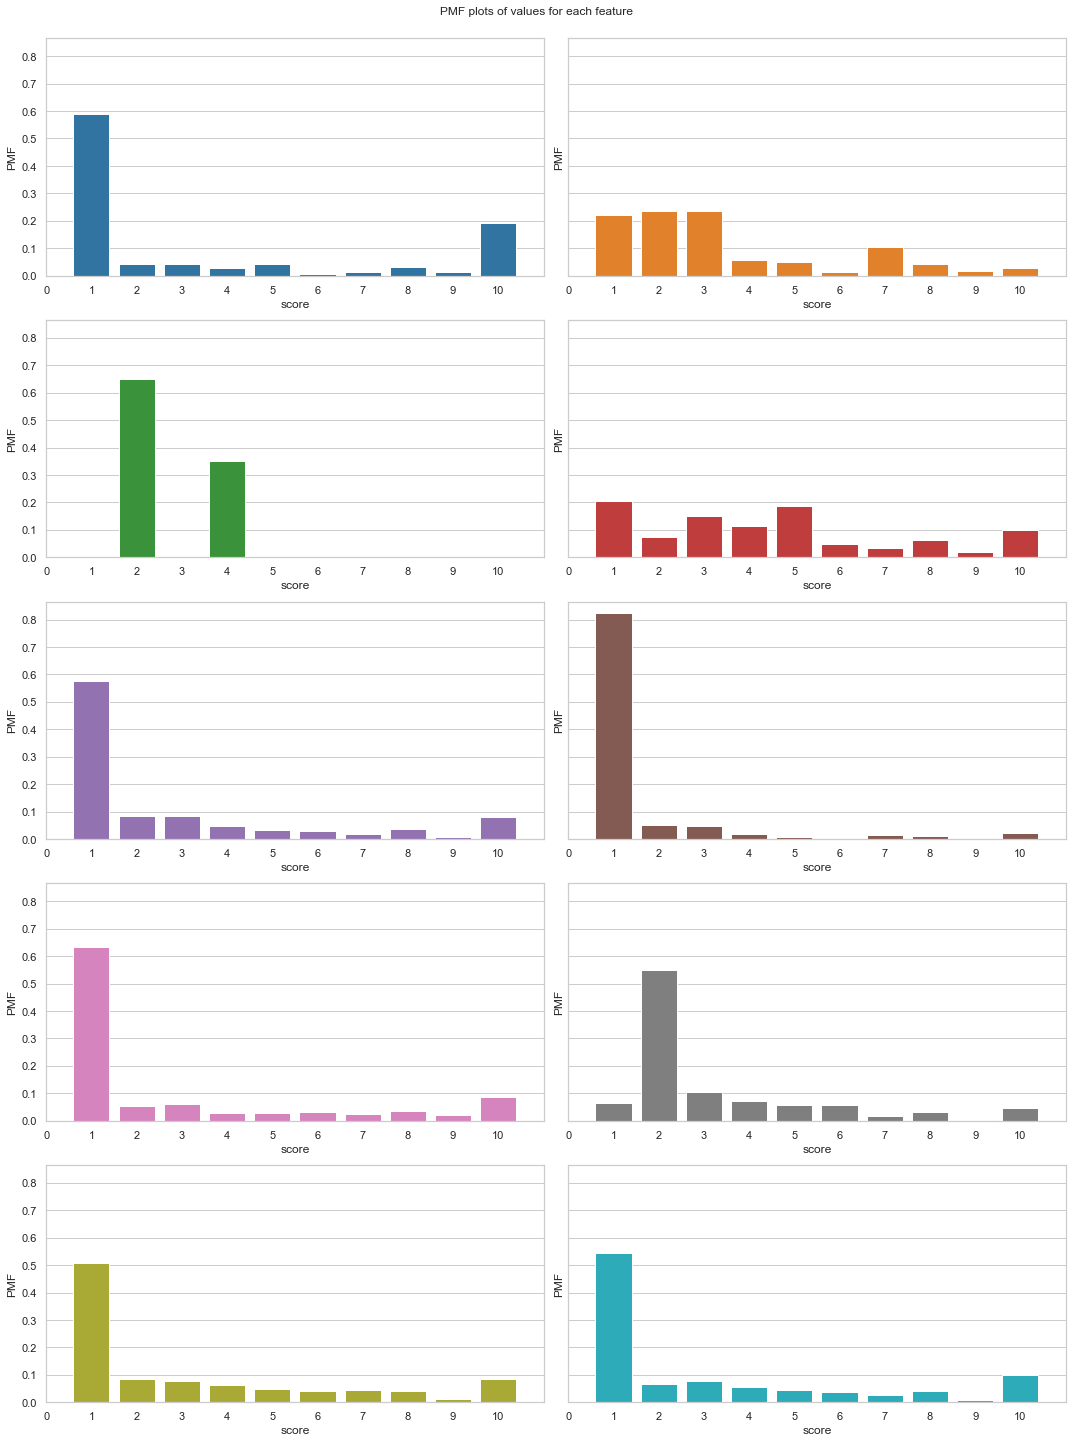

In [115]:
#create multiple subplots to see the PMF for each feature
#----------------------------------------------
fig, axs = plt.subplots(5,2,\
    figsize=(15,20),sharey=True, sharex=False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.suptitle('PMF plots of values for each feature', y=1)
# plt.setp(axs, xlim=(0,10), ylim=(0,0.75), xticks=list(range(0,11)))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))=axs

names = pmf_df.columns[1:]
names = names.format()
ax_lst = list(tuple(chain.from_iterable(axs)))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',\
    'tab:pink','tab:gray','tab:olive','tab:cyan']

for i in range(len(names)):
    sns.barplot(x=pmf_df.score, y=pmf_df[names[i]], ax=ax_lst[i], ci=None, color=colors[i])

for i, ax in zip(range(len(names)), axs.flat):
    ax.set(ylabel='PMF')
    ax.set_xlim([-1,10])
    ax.set_xticks(list(range(-1,10)))
    ax.set_xticklabels(list(range(0,11)))

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/pmf_plots.png', bbox_inches='tight',dpi=600)
plt.show()

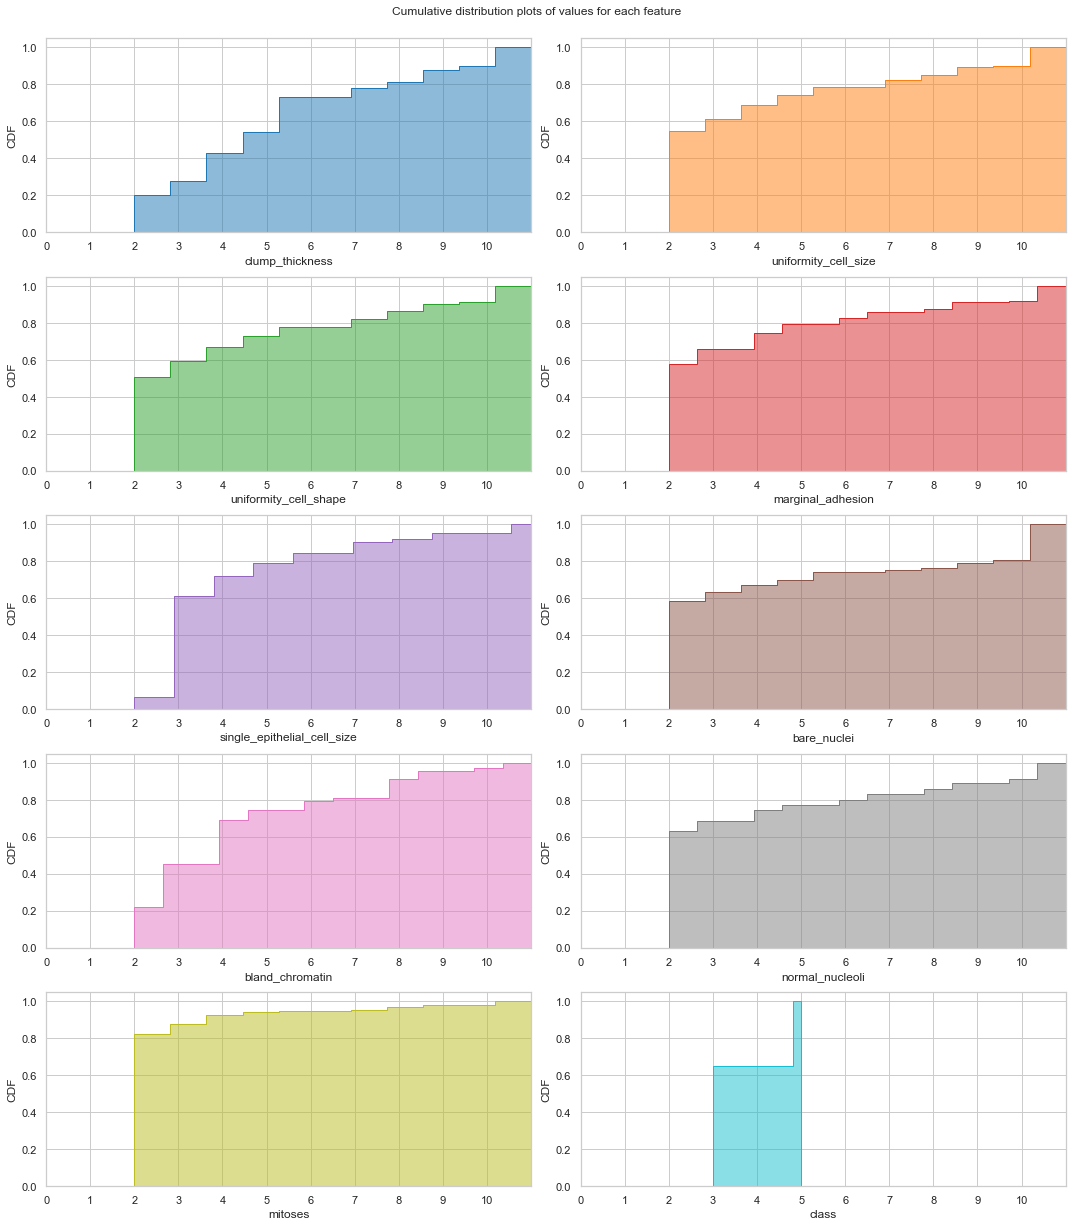

In [114]:
#create multiple subplots to see the cumulative distribution for each feature
#----------------------------------------------
fig, axs = plt.subplots(5,2,\
    figsize=(15,17),sharey=False, sharex=False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.suptitle('Cumulative distribution plots of values for each feature', y=1)
# plt.setp(axs, xlim=(0,10), ylim=(0,0.75), xticks=list(range(0,11)))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))=axs

names = df_dropped.columns
names = names.format()
ax_lst = list(tuple(chain.from_iterable(axs)))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',\
    'tab:pink','tab:gray','tab:olive','tab:cyan']


for i in range(len(names)):
    PMF_cdistplot(df_dropped[names[i]], df_dropped, ax=ax_lst[i], color=colors[i])
    # sns.barplot(x=pmf_df.score, y=pmf_df[names[i]], ax=ax_lst[i], ci=None, color=colors[i])

for i, ax in zip(range(len(names)), axs.flat):
    ax.set(ylabel='CDF')
    # ax.set(xlabel=names[num])
    ax.set_xlim([-1,10])
    ax.set_xticks(list(range(-1,10)))
    ax.set_xticklabels(list(range(0,11)))

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/cdf_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [26]:
sns.violinplot(x='class', y='bare_nuclei', data=df_dropped, ax=ax, color='tab:green')

<AxesSubplot:xlabel='class', ylabel='bare_nuclei'>

In [27]:
#define function for violin plots
def viol_plots(x,y,data,ax,**plt_kwargs):
    sns.violinplot(x=x, y=y, data=data, ax=ax, alpha=0.5, **plt_kwargs)
    return ax

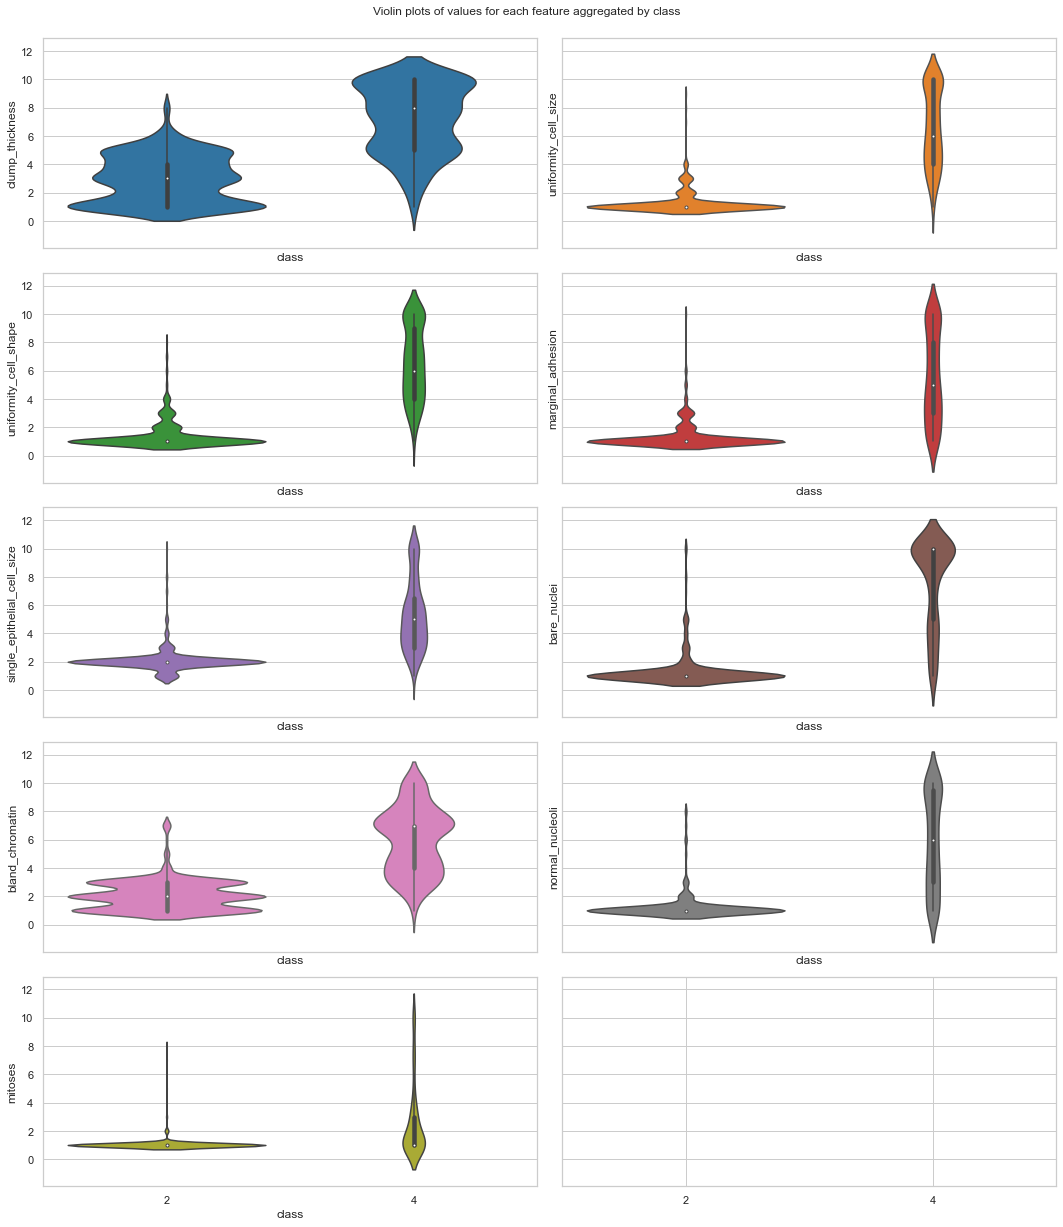

In [28]:
#create multiple subplots to see the violin plots for each feature aggregated on class
#----------------------------------------------
fig, axs = plt.subplots(5,2,\
    figsize=(15,17),sharey=True, sharex=True)

plt.suptitle('Violin plots of values for each feature aggregated by class', y=1)

viol_plots(ax=axs[0, 0], data=df_dropped, x='class', y='clump_thickness', color=colors[0])
viol_plots(ax=axs[0, 1], data=df_dropped, x='class', y='uniformity_cell_size', color=colors[1])
viol_plots(ax=axs[1, 0], data=df_dropped, x='class', y='uniformity_cell_shape', color=colors[2])
viol_plots(ax=axs[1, 1], data=df_dropped, x='class', y='marginal_adhesion', color=colors[3])
viol_plots(ax=axs[2, 0], data=df_dropped, x='class', y='single_epithelial_cell_size', color=colors[4])
viol_plots(ax=axs[2, 1], data=df_dropped, x='class', y='bare_nuclei', color=colors[5])
viol_plots(ax=axs[3, 0], data=df_dropped, x='class', y='bland_chromatin', color=colors[6])
viol_plots(ax=axs[3, 1], data=df_dropped, x='class', y='normal_nucleoli', color=colors[7])
viol_plots(ax=axs[4, 0], data=df_dropped, x='class', y='mitoses', color=colors[8])


plt.tight_layout()
fig.savefig('../images/exploratory_analysis/violin_plots.png', bbox_inches='tight',dpi=600)
plt.show()

### For the majority of features the most probable values/categories for the observtions are low numbers between 1 and 3 with the exception of class, which only has 2 values. For class, the most probable value is 2 or benign with about 60% of the data falling into that category. Aggregating the data based on class, each feature shows a more spread distribution when the class is malignant (or 4) while the majority of the values/categories for class 2 tend to be below 5 for all features.

In [82]:
#create list of column names
names = [col for col in df_dropped.columns]
#create list with number categories for the score given for each feature
score_lst = [x for x in sorted(df_dropped.clump_thickness.unique())]
# perc_total = round((df_dropped.loc[(df_dropped[names[0]]==score_lst[0]),'clump_thickness']).count()/len(df_dropped[names[0]])*100, 2)

def perc_total(data,colname, filter_val):
    ''' Function to calculate percent counts for each value in column when features are in columns
    *Args:
    data: dataframe being used
    colname: column of interest
    filter_val: criteria to find specific value in column
    '''
    x = round((data.loc[(data[colname]==filter_val),colname]).count()/len(data[colname])*100, 2)
    return x

#calculate conditional distributions
perc_lst = []
for name in names:
    for score in score_lst:
        key1='feature'
        key2='value'
        key3='percent'
        val1=name
        val2=score
        val3= perc_total(df_dropped,name, score)
        dict_=dict([(key1,val1),(key2,val2), (key3,val3)])
        perc_lst.append(dict_)
    

print(perc_lst)


[{'feature': 'clump_thickness', 'value': 1, 'percent': 20.35}, {'feature': 'clump_thickness', 'value': 2, 'percent': 7.32}, {'feature': 'clump_thickness', 'value': 3, 'percent': 15.23}, {'feature': 'clump_thickness', 'value': 4, 'percent': 11.57}, {'feature': 'clump_thickness', 'value': 5, 'percent': 18.74}, {'feature': 'clump_thickness', 'value': 6, 'percent': 4.83}, {'feature': 'clump_thickness', 'value': 7, 'percent': 3.37}, {'feature': 'clump_thickness', 'value': 8, 'percent': 6.44}, {'feature': 'clump_thickness', 'value': 9, 'percent': 2.05}, {'feature': 'clump_thickness', 'value': 10, 'percent': 10.1}, {'feature': 'uniformity_cell_size', 'value': 1, 'percent': 54.61}, {'feature': 'uniformity_cell_size', 'value': 2, 'percent': 6.59}, {'feature': 'uniformity_cell_size', 'value': 3, 'percent': 7.61}, {'feature': 'uniformity_cell_size', 'value': 4, 'percent': 5.56}, {'feature': 'uniformity_cell_size', 'value': 5, 'percent': 4.39}, {'feature': 'uniformity_cell_size', 'value': 6, 'perc

In [90]:
#create conditional distribution dataframe
cond_dist = pd.DataFrame(perc_lst)
cond_dist=cond_dist.pivot(index='feature', columns='value')['percent']
cond_dist

value,1,2,3,4,5,6,7,8,9,10
feature,,,,,,,,,,
bare_nuclei,58.86,4.39,4.10,2.78,4.39,0.59,1.17,3.07,1.32,19.33
bland_chromatin,21.96,23.43,23.57,5.71,4.98,1.32,10.40,4.10,1.61,2.93
class,0.00,65.01,0.00,34.99,0.00,0.00,0.00,0.00,0.00,0.00
clump_thickness,20.35,7.32,15.23,11.57,18.74,4.83,3.37,6.44,2.05,10.10
marginal_adhesion,57.54,8.49,8.49,4.83,3.37,3.07,1.90,3.66,0.59,8.05
mitoses,82.43,5.12,4.83,1.76,0.88,0.44,1.32,1.17,0.00,2.05
normal_nucleoli,63.25,5.27,6.15,2.64,2.78,3.22,2.34,3.37,2.20,8.78
single_epithelial_cell_size,6.44,55.05,10.40,7.03,5.71,5.86,1.61,3.07,0.29,4.54
uniformity_cell_shape,50.66,8.49,7.76,6.30,4.69,4.25,4.39,3.95,1.02,8.49


In [164]:
#create dataframe with counts
counts = df_dropped.apply(pd.value_counts)
counts = counts.fillna(0)
counts = counts.astype(int)
counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              10 non-null     int64
 1   uniformity_cell_size         10 non-null     int64
 2   uniformity_cell_shape        10 non-null     int64
 3   marginal_adhesion            10 non-null     int64
 4   single_epithelial_cell_size  10 non-null     int64
 5   bare_nuclei                  10 non-null     int64
 6   bland_chromatin              10 non-null     int64
 7   normal_nucleoli              10 non-null     int64
 8   mitoses                      10 non-null     int64
 9   class                        10 non-null     int64
dtypes: int64(10)
memory usage: 880.0 bytes


In [167]:
counts

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
1,139,373,346,393,44,402,150,432,563,0
2,50,45,58,58,376,30,160,36,35,444
3,104,52,53,58,71,28,161,42,33,0
4,79,38,43,33,48,19,39,18,12,239
5,128,30,32,23,39,30,34,19,6,0
6,33,25,29,21,40,4,9,22,3,0
7,23,19,30,13,11,8,71,16,9,0
8,44,28,27,25,21,21,28,23,8,0
9,14,6,7,4,2,9,11,15,0,0
10,69,67,58,55,31,132,20,60,14,0


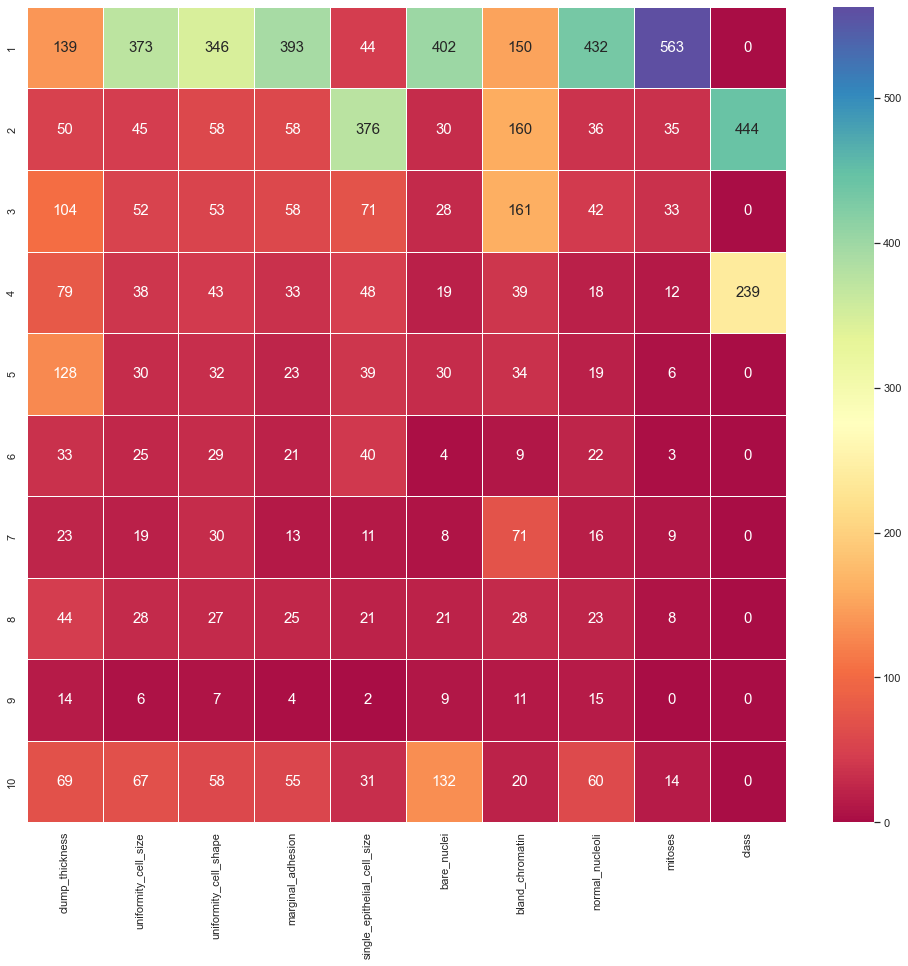

In [192]:
fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(counts, annot=True, cmap=cmap, annot_kws={"size": 15}, fmt='d', linewidths=0.5, center=275)

plt.show()

In [91]:
#export dataframe to CSV
df.to_csv('../data_processed/csv/wisconsin.csv')
cond_dist.to_csv('../data_processed/csv/cond_dist_wisconsin.csv')

-----------------------------

In [30]:
#create one big dataframe with all features and scores concatenated
names = df_dropped.columns
list_df = []

for i in range(len(names)):
    df_new = pd.DataFrame(df_dropped[names[i]])
    df_new.columns = ['score']
    df_new['feature'] = names[i]
    list_df.append(df_new)


conc_df = pd.concat(list_df, ignore_index=True)
conc_df

,score,feature
0,5,clump_thickness
1,5,clump_thickness
2,3,clump_thickness
3,6,clump_thickness
4,4,clump_thickness
...,...,...
6825,2,class
6826,2,class
6827,4,class
6828,4,class


In [31]:
#export dataframe to CSV
df.to_csv('../data_processed/csv/concat_wisconsin.csv')

-------------------------

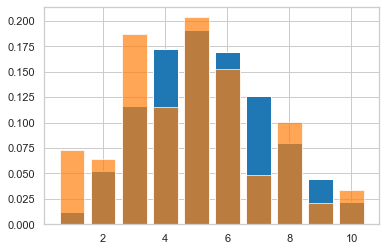

In [43]:
from scipy.stats import poisson

np.random.seed(42)

#created random integers from 1-10
x = np.random.randint(1,11,size=680)
# print(x)

y = poisson.pmf(x, mu=df_dropped['clump_thickness'].mean(), loc=1)

# plotting the graph
plt.bar(x, y)
plt.bar(df_dropped['clump_thickness'].unique(),df_dropped['clump_thickness'].value_counts()/len(df_dropped['clump_thickness']), alpha=0.7)
 
# showing the graph
plt.show()

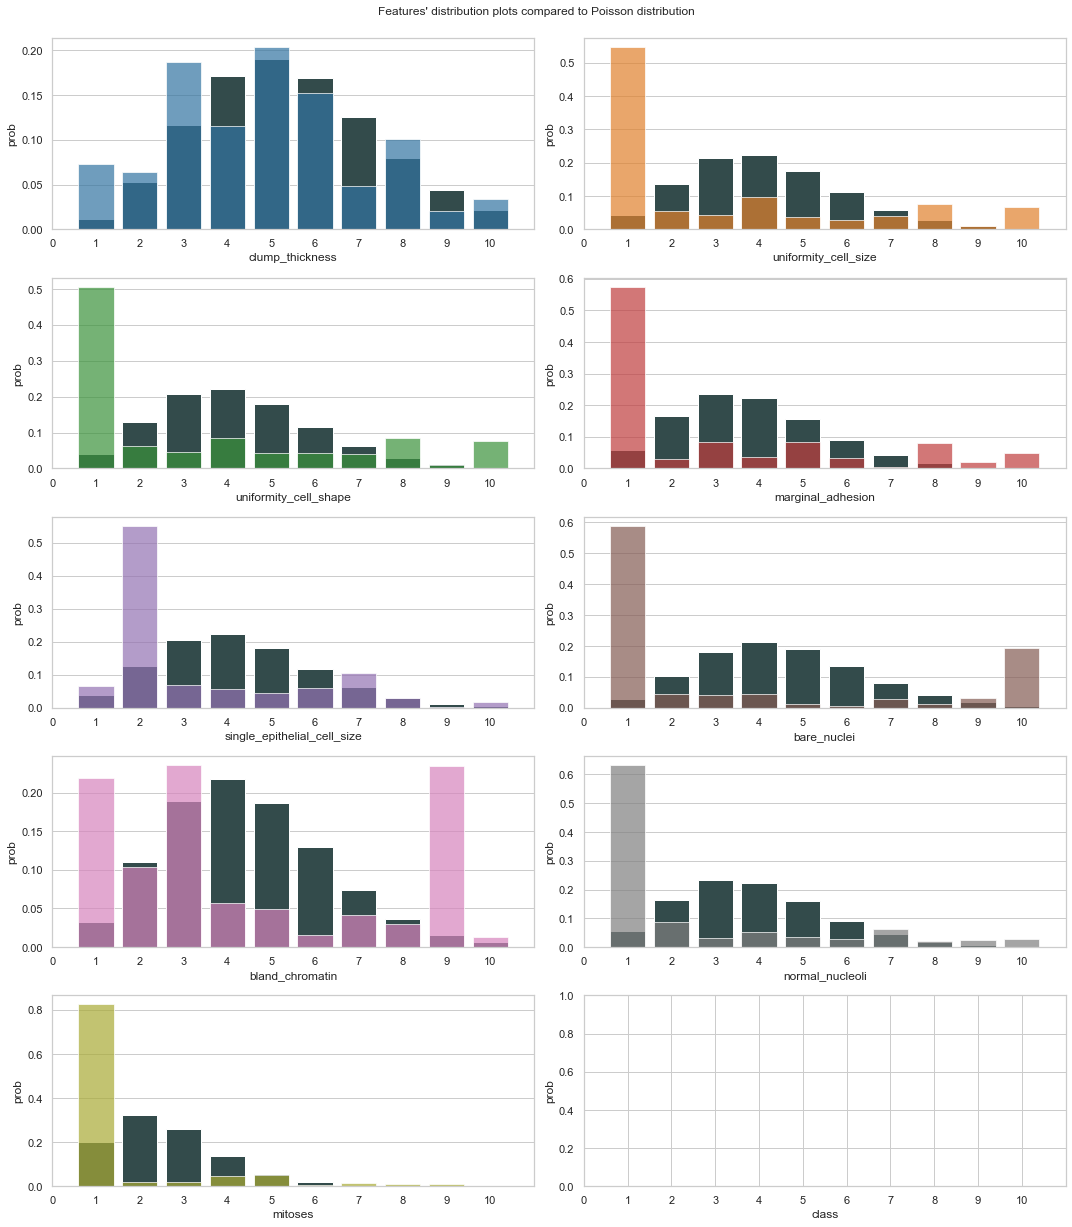

In [116]:
#create multiple subplots to see the cumulative distribution for each feature
#----------------------------------------------
fig, axs = plt.subplots(5,2,\
    figsize=(15,17),sharey=False, sharex=False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.suptitle("Features' distribution plots compared to Poisson distribution", y=1)
# plt.setp(axs, xlim=(0,10), ylim=(0,0.75), xticks=list(range(0,11)))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))=axs

names = df_dropped.columns
names = names.format()
ax_lst = list(tuple(chain.from_iterable(axs)))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',\
    'tab:pink','tab:gray','tab:olive','tab:cyan']


for i in range(len(names[:9])):
    np.random.seed(42)
    #created random integers from 1-10
    x = np.random.randint(1,11,size=680)
    # print(x)

    y = poisson.pmf(x, mu=df_dropped[names[i]].mean(), loc=1)
    sns.barplot(x=x, y=y, ax=ax_lst[i], ci=None, color='darkslategrey')
    # plt.bar(x, y, color='darkslategrey')
    sns.barplot(x=df_dropped[names[i]].unique(), y=df_dropped[names[i]].value_counts()/len(df_dropped[names[i]]), ax=ax_lst[i], ci=None, color=colors[i], alpha=0.7)
    # plt.bar(,, alpha=0.7, color=colors[i])
    # sns.barplot(x=pmf_df.score, y=pmf_df[names[i]], ax=ax_lst[i], ci=None, color=colors[i])

for i, ax in zip(range(len(names)), axs.flat):
    ax.set(ylabel='prob')
    ax.set(xlabel=names[i])
    ax.set_xlim([-1,10])
    ax.set_xticks(list(range(-1,10)))
    ax.set_xticklabels(list(range(0,11)))
    # ax.set_title(names[i])

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/poisson_comp_plots.png', bbox_inches='tight',dpi=600)
plt.show()